In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
  
warnings.filterwarnings(action = 'ignore')
  
import gensim
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
import os

In [2]:
train_path = os.path.join('..','data','raw','train.csv')
train_df = pd.read_csv(train_path)
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

In [4]:
import re
def remove_url(text):
    return re.sub(r'http\S+', '', text)

In [5]:
tweets_list = [remove_url(i) for i in train_df.text]

big_tweets_string = ' '.join(tweets_list)

from nltk.tokenize import word_tokenize

# Tokenize the string into words
tweet_tokens = word_tokenize(big_tweets_string)
tweet_tokens
words = [word.lower() for word in tweet_tokens if word.isalpha()]
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

model = gensim.models.KeyedVectors.load_word2vec_format('../models/GoogleNews-vectors-negative300.bin', binary = True)
model.vector_size

300

In [6]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model[word] for word in words if word in model.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in model.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
deeds,0.337891,0.195312,0.255859,-0.330078,0.132812,-0.216797,0.241211,0.365234,0.253906,0.300781,...,-0.138672,0.308594,-0.353516,-0.025024,0.070312,0.109863,0.111816,-0.337891,-0.119141,0.166016
reason,0.205078,0.004211,0.084473,0.091309,-0.152344,0.105957,0.308594,-0.114258,0.310547,0.192383,...,-0.226562,0.088867,-0.141602,-0.125000,0.079102,-0.095215,0.022949,-0.021606,0.255859,-0.000973
earthquake,-0.132812,0.083496,0.077637,0.196289,0.078125,0.134766,-0.190430,-0.427734,0.582031,0.184570,...,-0.232422,-0.171875,-0.169922,0.079590,0.230469,0.078613,-0.441406,0.112305,-0.287109,0.239258
may,0.059814,0.023804,0.067383,0.316406,-0.189453,0.016479,0.153320,0.025269,0.107910,-0.017578,...,-0.109863,-0.064453,0.053467,0.110840,0.208008,0.157227,0.061523,-0.109863,-0.008728,0.037109
allah,0.222656,0.114746,0.257812,0.283203,-0.133789,0.296875,0.060059,-0.062500,0.074219,0.416016,...,0.250000,0.108398,-0.011597,-0.218750,-0.079590,-0.063965,-0.013733,-0.187500,-0.235352,0.241211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
exploding,0.053711,0.156250,-0.192383,0.146484,-0.071777,-0.244141,0.020386,-0.175781,-0.003265,0.113770,...,0.207031,-0.186523,-0.228516,0.115723,-0.269531,0.020264,-0.077637,-0.049805,-0.099609,-0.008057
dei,0.248047,0.130859,-0.193359,0.233398,-0.002350,0.215820,-0.121582,-0.250000,0.126953,0.235352,...,-0.134766,0.018677,-0.486328,0.345703,0.019653,0.267578,-0.070312,-0.074219,-0.419922,-0.078125
overtaking,0.040039,-0.009094,0.044678,-0.208008,-0.170898,-0.160156,-0.144531,-0.227539,0.221680,0.337891,...,0.226562,0.066406,-0.263672,-0.020020,0.053467,-0.093750,0.040039,-0.076172,-0.060059,-0.182617
developing,-0.161133,0.112793,0.063965,0.097656,-0.184570,0.211914,0.030640,-0.161133,-0.089355,0.088379,...,-0.127930,0.059326,-0.188477,-0.062988,-0.108887,0.156250,0.105957,0.037109,0.141602,0.207031


In [7]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:400])

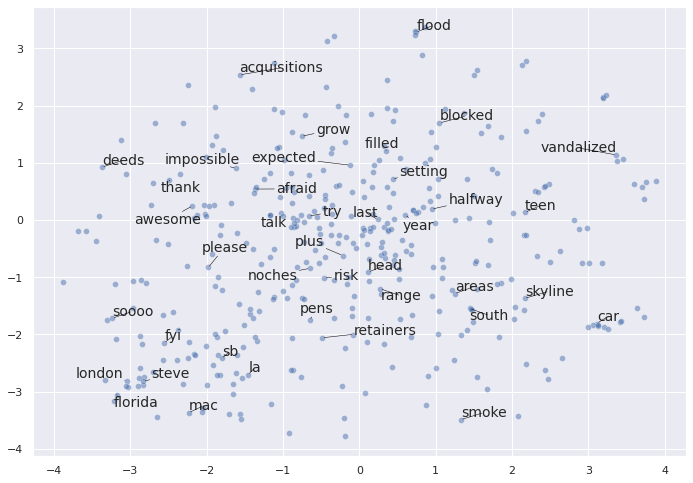

In [8]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()